# **Time Series**
In this code I have used Time Series Models to do Forecasting.

In [31]:
#Importing Required Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA 
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv( '/content/wsb.csv' )
df.head()

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Month                  48 non-null     int64
 1   Sale Quantity          48 non-null     int64
 2   Promotion Expenses     48 non-null     int64
 3   Competition Promotion  48 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


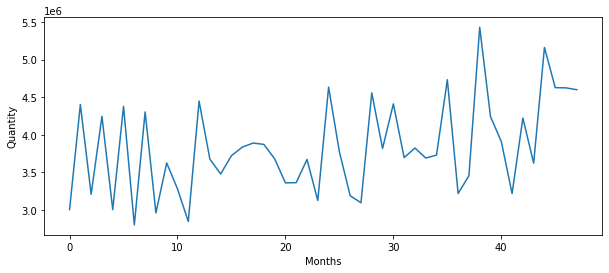

In [5]:
#Visualizing Sale quantity over Month 
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( df['Sale Quantity'] );

In [6]:
#12 Month Moving Average 
df['mavg_12'] = df['Sale Quantity'].rolling( window = 12 ).mean().shift(1)

In [7]:
#To display values upto 2 decimal points 
pd.set_option('display.float_format', lambda x : '%.2f' % x)
df[['Sale Quantity', 'mavg_12']][0 : ]

,Sale Quantity,mavg_12
0,3002666,NaN
1,4401553,NaN
2,3205279,NaN
3,4245349,NaN
4,3001940,NaN
5,4377766,NaN
6,2798343,NaN
7,4303668,NaN
8,2958185,NaN
9,3623386,NaN


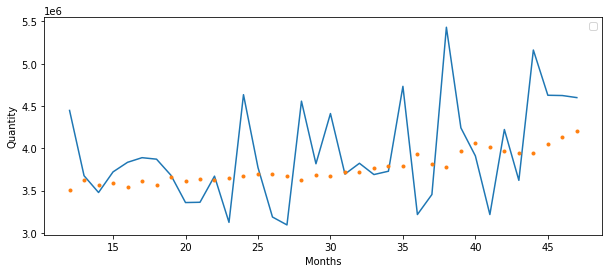

In [8]:
#Plotting actual versus predicted values 
plt.figure( figsize=(10, 4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( df['Sale Quantity'][12 : ] );
plt.plot( df['mavg_12'][12 : ], '.' );
plt.legend();

In [9]:
#Checkig Accuracy 
#Method 1 : MAPE 
def get_mape(actual, predicted): 
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round( np.mean(np.abs((actual - predicted) / actual)) * 100, 2 )

In [12]:
get_mape( df['Sale Quantity'][36 : ].values, df['mavg_12'][36 : ].values)

14.04

In [15]:
np.sqrt(mean_squared_error( df['Sale Quantity'][36:].values, df['mavg_12'][36:].values))

734725.8359239782

In [18]:
#Method 2 : Exponential Smoothing
df['ewm'] = df['Sale Quantity'].ewm( alpha = 0.2 ).mean()
pd.options.display.float_format = '{:.2f}'.format
df[36 : ]

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,ewm
36,37,3216483,121,1,3928410.33,3828234.64
37,38,3453239,128,0,3810280.00,3753219.93
38,39,5431651,170,0,3783643.33,4088961.93
39,40,4241851,160,0,3970688.42,4119543.81
40,41,3909887,151,1,4066369.08,4077607.99
41,42,3216438,120,1,4012412.75,3905359.34
42,43,4222005,152,0,3962369.58,3968692.78
43,44,3621034,125,0,3946629.42,3899157.24
44,45,5162201,170,0,3940489.50,4151776.99
45,46,4627177,160,0,4052117.17,4246860.31


In [19]:
#MAPE OF EWM 
get_mape( df[['Sale Quantity']][36 : ].values, df[['ewm']][36 : ].values)

11.15

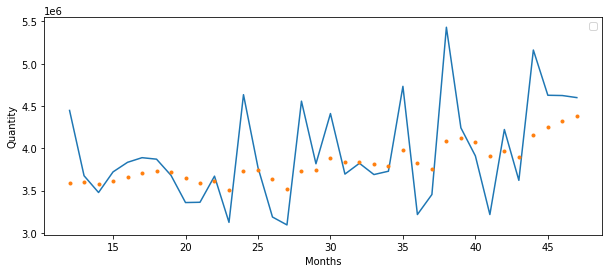

In [20]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( df['Sale Quantity'][12 : ] );
plt.plot( df['ewm'][12 : ], '.' );
plt.legend();

In [22]:
#Method 3 : DECOMPOSING TIME SERIES 
ts_decompse = seasonal_decompose( np.array(df['Sale Quantity']), model='multiplicative', freq = 12 )

<ipython-input-22-7d4261b4dd22>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  ts_decompse = seasonal_decompose( np.array(df['Sale Quantity']), model='multiplicative', freq = 12 )


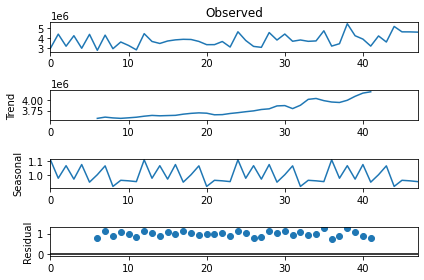

In [23]:
ts_plot = ts_decompse.plot()

In this code I have used Time Series : ARIMA (Auto Regressive Integrated Moving Average) Model to do Forecasting.

In [25]:
#Importing the Dataset
df = pd.read_excel('/content/store.xls')
df.head()

,Date,demand
0,2014-10-01,15
1,2014-10-02,7
2,2014-10-03,8
3,2014-10-04,10
4,2014-10-05,13


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    115 non-null    datetime64[ns]
 1   demand  115 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


In [27]:
#Data Processing
df.set_index( pd.to_datetime(df.Date), inplace= True)
df.drop('Date', axis = 1, inplace = True)
df[-5 : ]

,demand
Date,
2015-01-19,18
2015-01-20,22
2015-01-21,22
2015-01-22,21
2015-01-23,17


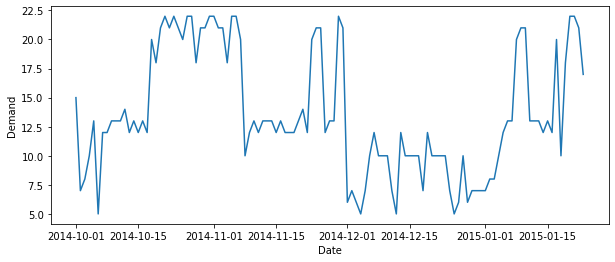

In [28]:
#Plotting in Graph
plt.figure( figsize=(10,4))
plt.xlabel( "Date" )
plt.ylabel( "Demand" )
plt.plot( df.demand );

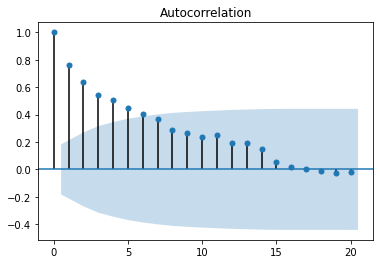

In [30]:
#Using ACF Plot to check for Stationarity
acf_plot = plot_acf( df.demand, lags = 20 )

As we can see the slow decline if auto-correlation for different lags indicates that the series is not stationary, to confirm/check this we will use a method known as Dickey-Fuller Test.

In [32]:
def adfuller_test( ts ):
    adfuller_result = adfuller( ts, autolag=None )
    adfuller_out = pd.Series(adfuller_result[0 : 4], index=['Test Statistic', 'p-value', 'Lags Used',
                                                          'Number of Observations Used'])
    print( adfuller_out )

In [33]:
#Checking Results
adfuller_test( df.demand )

Test Statistic                 -1.65
p-value                         0.46
Lags Used                      13.00
Number of Observations Used   101.00
dtype: float64


As we can see the p-value is greater than 0.05 which tells that the series is not stationary.

In [35]:
#Differencing to Convert Non Stationary to Stationary
df['demand_diff'] = df.demand - df.demand.shift(1)
df.head()

,demand,demand_diff
Date,,
2014-10-01,15,NaN
2014-10-02,7,-8.00
2014-10-03,8,1.00
2014-10-04,10,2.00
2014-10-05,13,3.00


In [36]:
#Dropping Na Values
diff_df = df.dropna()

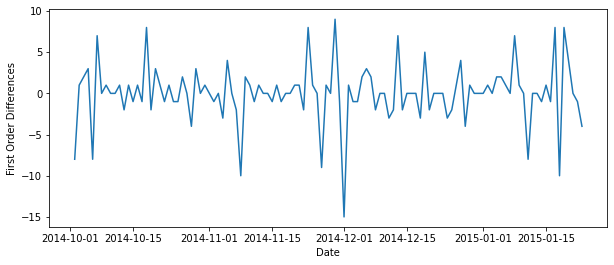

In [37]:
plt.figure( figsize=(10,4))
plt.xlabel( "Date" )
plt.ylabel( "First Order Differences" )
plt.plot( diff_df.demand_diff );

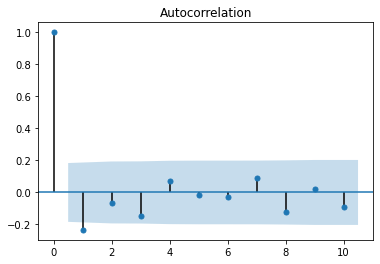

In [38]:
pacf_plot = plot_acf( df.demand_diff.dropna(), lags=10 )

In [39]:
#Now we split the data for training and testing
store_train = df[0:100]
store_test = df[100:]

In [40]:
#Applying Model
arima = ARIMA( store_train.demand, order = (1, 1, 1))
arima_model = arima.fit()
arima_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 532.1510  
Dependent Variable: D.demand         Log-Likelihood:      -256.89   
Date:               2023-01-19 15:35 Scale:               1.0000    
No. Observations:   99               Method:              css-mle   
Df Model:           3                Sample:              10-02-2014
Df Residuals:       96                                    01-08-2015
Converged:          1.0000           S.D. of innovations: 3.237     
No. Iterations:     10.0000          HQIC:                525.971   
AIC:                521.7706                                        
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const             0.0357    0.1599   0.2232  0.8234  -0.2776   0.3490
ar.L1.D.demand    0.4058    0.2294   1.7695  0.0768  -0.0437   0.8554
ma.L1.D.demand   -0.7155    0.1790  -3.9972  0.0001  -1.0663  -0.3647
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            2.4641             0.0000           2.4641             0.0000
MA.1            1.3977             0.0000           1.3977             0.0000
====================================================================

"""

In [41]:
#Checking Accuracy and Forecasting
store_predict, stderr, ci = arima_model.forecast(steps = 15)
store_predict

array([17.32365077, 16.25870205, 15.84771445, 15.70212651, 15.66424676,
       15.67007867, 15.69365025, 15.72442119, 15.75811388, 15.79299232,
       15.82835197, 15.86390691, 15.89954111, 15.93520747, 15.97088689])

In [42]:
def get_mape(actual, predicted): 
    y_true, y_pred = np.array(actual), np.array(predicted)
    return np.round( np.mean(np.abs((actual - predicted) / actual)) * 100, 2 )

In [44]:
get_mape( df.demand[100 : ], store_predict )

24.17